# BUSA8000 Techniques in Business Analytics
### Amey Pradeep Sawant 
### 48401102

I acknowledge that I have not used GAITs (e. g., ChatGPT) in drafting and proofreading of this assignment.

## Section 1 - Data cleansing : 
This section focuses on loading the dataset and cleaning it.

### Step 1: Load the Dataset and Examine the Structure

In [1]:
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv("customer_shopping_data.csv")

In [3]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card    8/05/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash   11/09/2021       Metrocity  
3    Credit Card    5/16/2021    Metropol AVM  
4           Cash   10/24/2021          Kanyon  


### Step 2: Handling Missing values 

In [4]:
#Check for missing values in the dataset
missing_values = data.isnull().sum()
print("\nMissing values in each column: \n", missing_values)


Missing values in each column: 
 invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             2
payment_method    1
invoice_date      0
shopping_mall     0
dtype: int64


####  There are a few missing values in the price and payment_method columns. Here's how we can handle them:

In [5]:
#Imputing Missing Values in the price Column
data['price'].fillna(data['price'].median(), inplace = True)

In [6]:
#Imputing missing values in 'payment_method' column 
data['payment_method'].fillna(data['payment_method'].mode()[0], inplace=True)

In [7]:
#Verifying the Absence of Missing Values 
missing_valuescheck = data.isnull().sum()
print("\nNumber of missing values after imputing the data:\n", missing_valuescheck)


Number of missing values after imputing the data:
 invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


#### The missing values are now resolved 

### Step 3 : Handling duplicate values 

In [8]:
#Check for duplicate values 
duplicates = data.duplicated().sum()
print("\n The total number of duplicate values are:\n", duplicates)


 The total number of duplicate values are:
 0


##### As there are no duplicate values in the dataset, we need not change or remove any values, we then move on to the next step

### Step 4 : Ensuring Correct Data Types -  
We need to check that each row is in a correct format. For example - 'age' should be an integer, 'price'  should be a float, and 'invoice_data' should be in a date format

In [9]:
#Checking data types -
print("\n Data types before conversion:\n", data.dtypes)


 Data types before conversion:
 invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object


#### Here's what the data types tell us:

invoice_no, customer_id, gender, category, payment_method, shopping_mall: These are correctly identified as object types, which are suitable for categorical or string data.

age, quantity: These are correctly identified as int64, representing integer values, which is appropriate.

price: This is correctly identified as float64, representing continuous numerical values.

invoice_date: This is currently an object type, but it should be converted to a datetime type to facilitate any date-based analysis.

#### Converting Data Types -Since most columns are already in the correct format, the primary conversion needed is for the invoice_date column from object to datetime. 


In [10]:
# Display a sample of raw invoice_date values
raw_dates_sample = data['invoice_date'].head(20)
print("Sample of raw invoice_date values:\n", raw_dates_sample)


Sample of raw invoice_date values:
 0      8/05/2022
1     12/12/2021
2     11/09/2021
3      5/16/2021
4     10/24/2021
5      5/24/2022
6      3/13/2022
7      1/13/2021
8     11/04/2021
9      8/22/2021
10    12/25/2022
11    10/28/2022
12     7/31/2022
13         44882
14     6/03/2022
15    11/07/2021
16     1/16/2021
17     1/05/2022
18     7/26/2021
19     3/07/2023
Name: invoice_date, dtype: object


##### 'invoice_date' column contains a mix of standard date strings and Excel serial numbers. To handle this situation, we'll need to check the format of each entry in the invoice_date column and apply the appropriate conversion based on the type of data.

In [14]:
import numpy as np

# Function to convert the invoice_date based on its format
def convert_date(x):
    try:
        # If it's a string and looks like a date, parse it
        if isinstance(x, str):
            return pd.to_datetime(x, errors='coerce')
        # If it's numeric, treat it as an Excel date
        elif isinstance(x, (int, float)) and not np.isnan(x):
            return pd.to_datetime(x, origin='1899-12-30', unit='D')
        else:
            return np.nan  # Handle NaNs or unexpected types
    except Exception as e:
        print(f"Error converting date: {x} - {e}")
        return np.nan

# Apply the conversion function to the invoice_date column
data['invoice_date'] = data['invoice_date'].apply(convert_date)

# Check the data types after conversion
print("\nData types after conversion:\n", data.dtypes)

# Display the first few dates to verify conversion
print("\nSample of 'invoice_date' after conversion:\n", data['invoice_date'].head())



Data types after conversion:
 invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

Sample of 'invoice_date' after conversion:
 0   2022-08-05
1   2021-12-12
2   2021-11-09
3   2021-05-16
4   2021-10-24
Name: invoice_date, dtype: datetime64[ns]


It looks like the invoice_date column has been successfully converted to the correct datetime64[ns] format! The dates are now properly recognized as datetime objects, which means we can perform time-based analysis and operations on them.

### Step 6: Visualizing Data Distribution and Identifying Outliers

We will create histograms and box plots to:

Understand the distribution of key numerical variables.
Identify any outliers.
Assess skewness in the data.

#### 1: Create Histograms for Key Numerical Variables

We'll create histograms for the following columns:

Age,
quantity and
price

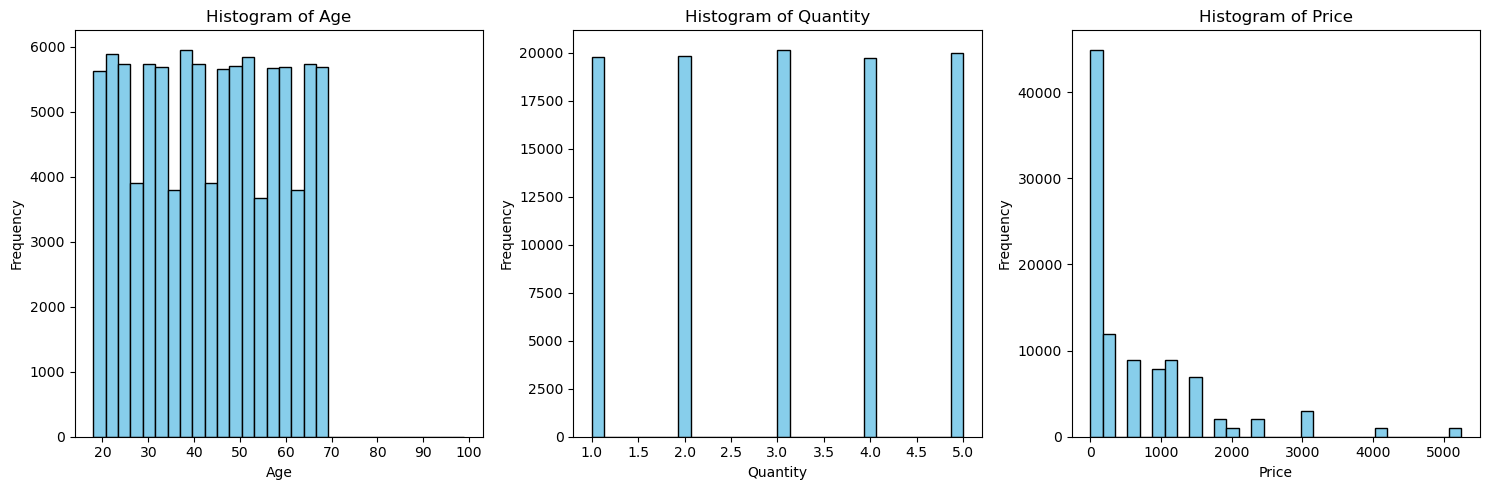

In [16]:
import matplotlib.pyplot as plt

# Create histograms for the numerical columns
numeric_columns = ['age', 'quantity', 'price']

# Set up the plot size
plt.figure(figsize=(15, 5))

# Loop through each numeric column and create a histogram
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


### Analysis of the histograms:

1. Histogram of Age
Distribution: The age distribution appears relatively uniform across the different age groups. This indicates that customers of all ages are represented fairly equally in the dataset.

Range: The age ranges from about 20 to 70 years.

Gaps: There are small gaps, which could suggest missing or underrepresented age groups, but overall the distribution is even.

2. Histogram of Quantity
Distribution: The quantity purchased in each transaction seems to be evenly distributed across the values 1 to 5. This suggests that customers are equally likely to purchase different quantities.

Uniform Distribution: The uniformity might imply that the product categories or types have similar purchase patterns, with no particular quantity being overwhelmingly more common.

3. Histogram of Price
Distribution: The price distribution is highly skewed to the right, with a large number of transactions at lower price points and fewer at higher price points.

Skewness:
This positive skew indicates that most customers are purchasing lower-priced items, with fewer buying high-priced items.

Outliers:
There are some outliers with significantly higher prices (around 4000-5000 TL), which might require further investigation.

### Interpretation:
Age:
The fairly uniform distribution suggests that your customer base is well distributed across different age groups, which is good for targeting marketing strategies.

Quantity:
The uniform distribution here indicates consistent buying patterns in terms of quantity, which could simplify inventory management and marketing campaigns.

Price:
The skewed distribution suggests that most transactions are of lower value, which might indicate a focus on lower-priced goods. The outliers at the high end could be premium products that warrant further analysis.

### 2: Analyzing Outliers with Box Plots
Box plots are an excellent tool for visualizing the spread of data and identifying outliers. We'll create box plots for the age, quantity, and price columns to examine the presence of outliers and understand the distribution further.

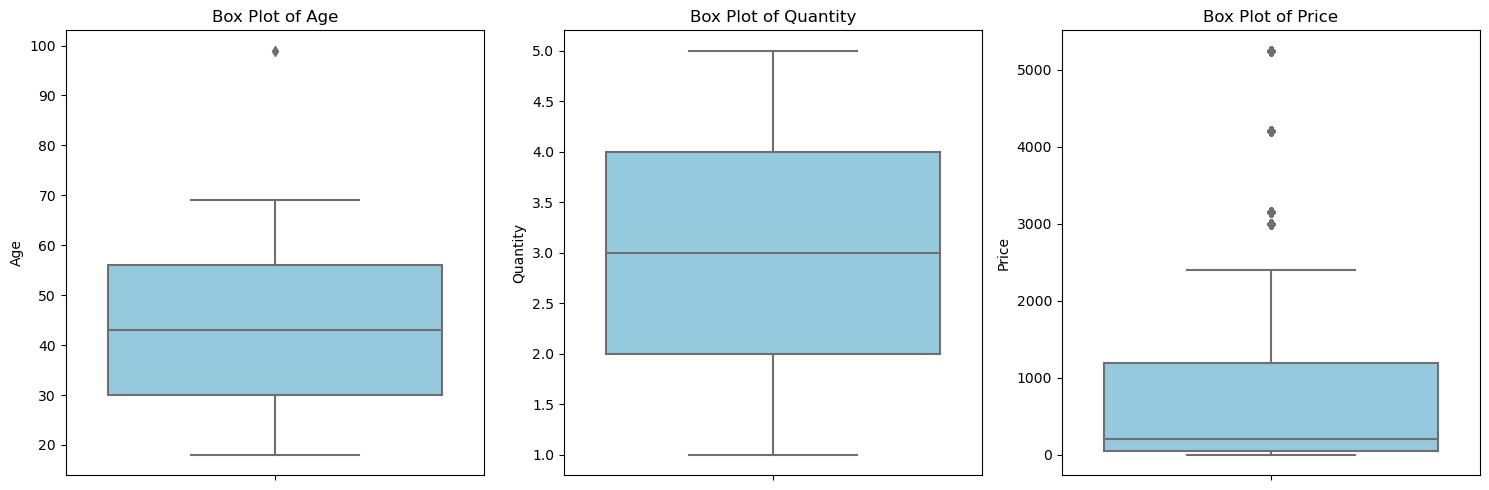

In [17]:
import seaborn as sns

# Set up the plot size
plt.figure(figsize=(15, 5))

# Loop through each numeric column and create a box plot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Box Plot of {column.capitalize()}')
    plt.ylabel(column.capitalize())

# Show the plot
plt.tight_layout()
plt.show()


### Analysis of the box plots to identify any outliers and understand the distribution of the data:

#### 1. Box Plot of Age
Outlier: There is one noticeable outlier in the age data, around 100 years old.

Spread: The central 50% of the data (the interquartile range, or IQR) is between roughly 30 and 60 years old.

Median: The median age is around 45, which is the line inside the box.

Interpretation:
The outlier might be an error or an unusual case. It could be worth investigating this data point further to determine if it should be removed or kept.


#### 2. Box Plot of Quantity
No Outliers: The box plot shows a clean distribution without any outliers.

Spread: The IQR spans from about 2 to 4 units, with purchases ranging from 1 to 5 units.

Median: The median quantity is around 2.5 units.

Interpretation:
The quantity data is well-behaved and doesn't require any further cleaning or transformation.

#### 3. Box Plot of Price
Outliers: There are several outliers in the price data, with prices going above 3000 TL, and a few reaching as high as 5000 TL.

Spread: The IQR for prices is between roughly 0 and 1000 TL, indicating that most transactions are relatively low-cost.

Median: The median price is quite low, which aligns with the histogram that showed a skew towards lower prices.

#### Interpretation:
The outliers in the price data may represent high-value transactions or errors. 

### Step 3: Transforming Outliers and Skewed Data

Given the skewness in the price data and the outlier in the age data, we'll apply transformations to address these issues. A common method for dealing with skewed data is the log transformation. This transformation can help in reducing the impact of extreme values and making the distribution more normal.

1. Log Transformation of Price -
We'll apply a log transformation to the price column to reduce skewness.

2. Handling the Outlier in Age - 
For the outlier in the age column, a log transformation might not be as beneficial. Instead, we can either remove the outlier or apply a cap to limit extreme values.

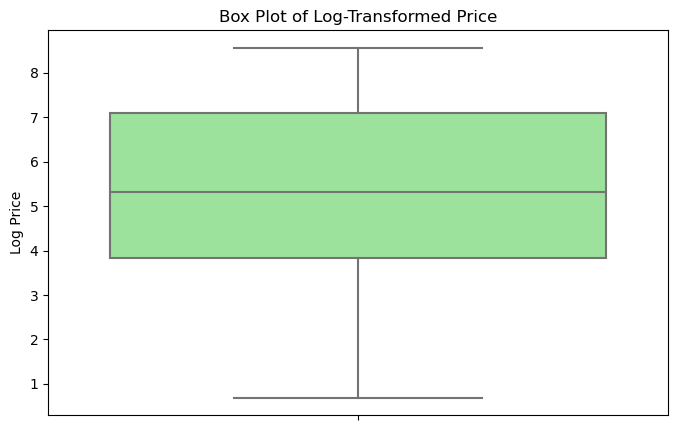

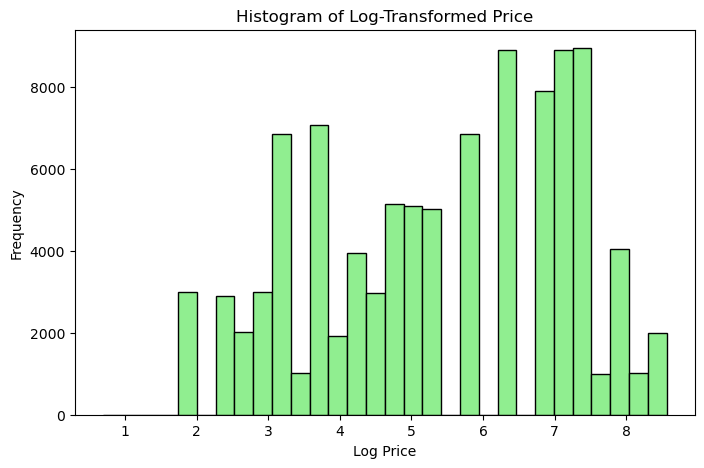

In [19]:
import numpy as np

# Apply log transformation to the 'price' column
# Adding a small constant (1) to avoid taking log of zero
data['log_price'] = np.log1p(data['price'])

# Create a box plot to check the effect of the log transformation on 'price'
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['log_price'], color='lightgreen')
plt.title('Box Plot of Log-Transformed Price')
plt.ylabel('Log Price')
plt.show()

# Check the distribution with a histogram
plt.figure(figsize=(8, 5))
plt.hist(data['log_price'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Log-Transformed Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()


#### Observations:

Distribution: The log transformation has spread out the data more evenly across the range, resulting in a more normalized distribution compared to the original highly skewed data.

Reduction of Outliers' Impact: The extreme high values that were present in the original price distribution have been compressed into a more manageable range, making the distribution more suitable for analysis.

Multiple Peaks: There are still several peaks in the distribution, indicating that there might be distinct segments or clusters in the data based on price, which could be interesting for further analysis.

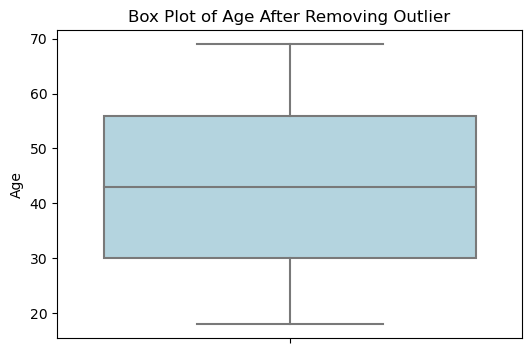

In [20]:
# Identify the outlier
age_outlier = data['age'] > 90  # Assuming 90 is the threshold for a reasonable age

# Drop the outlier
data = data[~age_outlier]

# Verify the removal by checking the box plot again
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['age'], color='lightblue')
plt.title('Box Plot of Age After Removing Outlier')
plt.ylabel('Age')
plt.show()


### Summary of Data Cleansing:

Missing Values - Handled missing values in price and payment_method.

Duplicates - Checked and removed any duplicate rows.

Data Type Conversion - Converted invoice_date to the correct datetime format.

Log Transformation - Applied a log transformation to the price column to reduce skewness.

Outlier Handling - Removed the outlier in the age column.

## Section 2 : Analysis

### Task 1: Customer Segmentation for Marketing Campaigns

Objective:
Identify key customer segments or product categories that should be targeted for marketing campaigns based on their spending behavior.

#### Step 1 - Analyze Spending by Category

We’ll analyze the spending behavior by product category to see which categories contribute the most to sales. This can help in identifying which categories are worth focusing on in marketing efforts.

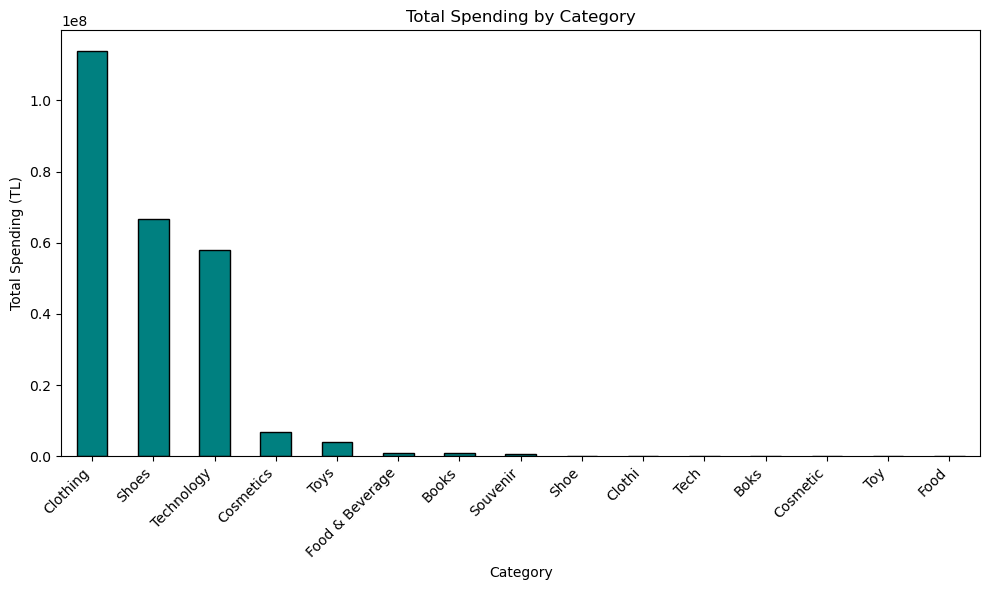

In [22]:
# Calculate total spending by multiplying quantity by price
data['total_spending'] = data['quantity'] * data['price']

# Group by category and calculate total spending per category
category_spending = data.groupby('category')['total_spending'].sum().sort_values(ascending=False)

# Plot the spending by category
plt.figure(figsize=(10, 6))
category_spending.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spending (TL)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Analysis of the Results:

Total Spending by Category :

Top Categories - The top three categories in terms of total spending are:

Clothing - This category leads significantly, with spending well over 100 million TL.

Shoes - The second-highest category, with spending around 70 million TL.

Technology - The third, with spending slightly below Shoes, around 65 million TL.

Other Categories - Categories like Cosmetics, Toys, and Food & Beverage have significantly lower spending, indicating they might be less critical for high-value marketing campaigns.


#### Insights:
Marketing Focus: For a high-impact marketing campaign, focusing on the Clothing, Shoes, and Technology categories would likely yield the best return on investment.

#### Niche Opportunities:
While smaller categories like Toys and Food & Beverage might not contribute as much to overall spending, targeted campaigns could help boost sales in these areas.

#### Step 2: Analyze Spending by Customer Demographics
In addition to product categories, we can analyze spending by customer demographics (e.g., gender or age groups) to identify key customer segments.

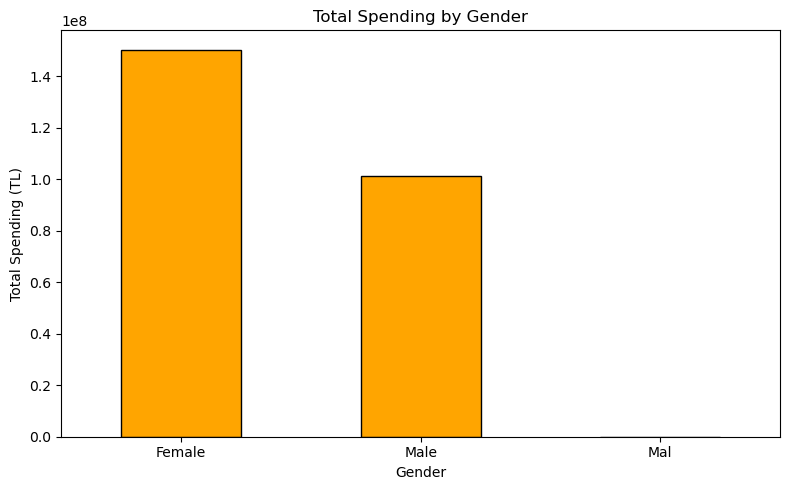

In [24]:
# Group by gender and calculate total spending per gender
gender_spending = data.groupby('gender')['total_spending'].sum().sort_values(ascending=False)

# Plot the spending by gender
plt.figure(figsize=(8, 5))
gender_spending.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending (TL)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Total Spending by Gender :

Female vs. Male Spending:
Females: Lead significantly in total spending, contributing over 140 million TL.

Males: Contribute less, around 100 million TL.

There’s a small error where "Male" and "Mal" appear separately, suggesting some data might have been miscategorized, which could slightly affect the analysis.

#### Insights:

Target Audience: Female customers are the dominant spenders, so marketing campaigns tailored towards women are likely to be more effective.

Data Cleaning Opportunity: The presence of "Mal" as a separate category suggests that a small data entry error exists, which should be cleaned up for more accurate analysis.

gender
Female    59484
Male      39976
Name: count, dtype: int64


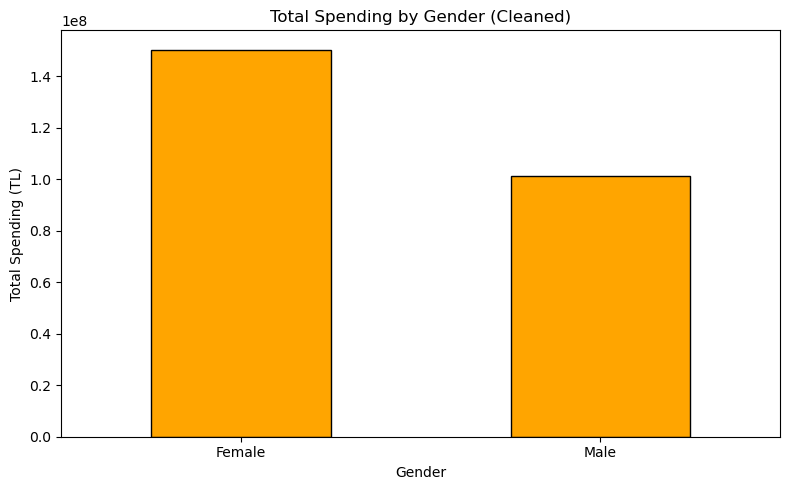

In [25]:
# Correct the typo in the gender data
data['gender'] = data['gender'].replace({'Mal': 'Male'})

# Verify the correction
print(data['gender'].value_counts())

# Re-run the spending analysis by gender
gender_spending_cleaned = data.groupby('gender')['total_spending'].sum().sort_values(ascending=False)

# Plot the corrected spending by gender
plt.figure(figsize=(8, 5))
gender_spending_cleaned.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Spending by Gender (Cleaned)')
plt.xlabel('Gender')
plt.ylabel('Total Spending (TL)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Task 2: Box Plot Comparison of Spending Scores by Gender

Next, we’ll compare spending scores between male and female customers using a box plot to visualize the distribution and see if there are significant differences in spending behavior.

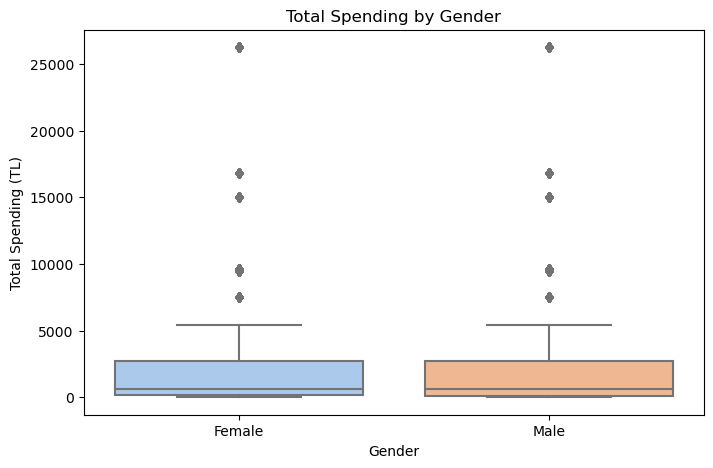

In [27]:
# Create a box plot comparing total spending between genders
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='total_spending', data=data, palette='pastel')
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending (TL)')
plt.show()


#### Box Plot of Total Spending by Gender

Comparison: The box plot shows that both males and females have a similar distribution of total spending, with comparable medians.

Outliers: Both genders exhibit a similar range of outliers, indicating that there are high spenders in both groups. However, the overall distribution suggests that the majority of spending is concentrated at lower levels.

Insight: Despite females leading in total spending overall (as seen in the previous bar plot), the spending distribution per transaction is similar between genders. This suggests that females may be making more frequent purchases rather than significantly larger individual purchases.

### Task 3 : Scatter Plot Analysis of age vs spending 

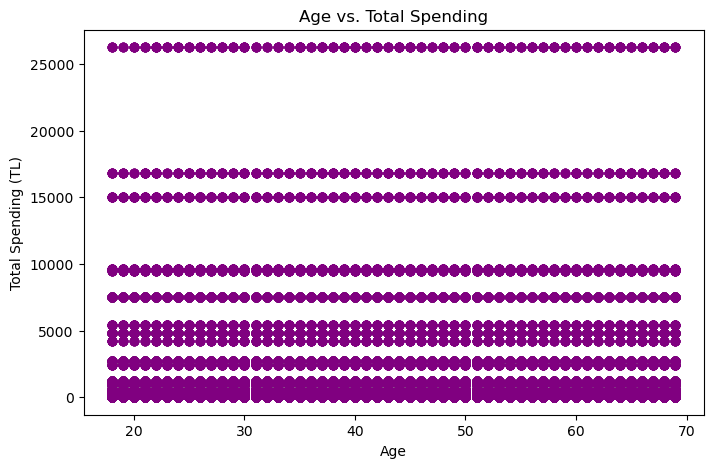

In [28]:
# Create a scatter plot to visualize age vs. total spending
plt.figure(figsize=(8, 5))
plt.scatter(data['age'], data['total_spending'], alpha=0.5, color='purple')
plt.title('Age vs. Total Spending')
plt.xlabel('Age')
plt.ylabel('Total Spending (TL)')
plt.show()


Pattern: The scatter plot shows that spending is fairly evenly distributed across all age groups, with no clear correlation between age and total spending.

Spending Levels: Spending appears to be stratified into distinct bands (possibly due to specific price points or product categories), but these bands are consistent across age groups.

Insight: Since there’s no strong correlation between age and spending, age alone might not be a strong predictor of spending behavior. Other factors like product category or frequency of purchases might play a larger role.

### Task 4: Age Group Segmentation Analysis

Finally, we’ll segment customers into different age groups and analyze how spending varies across these groups.

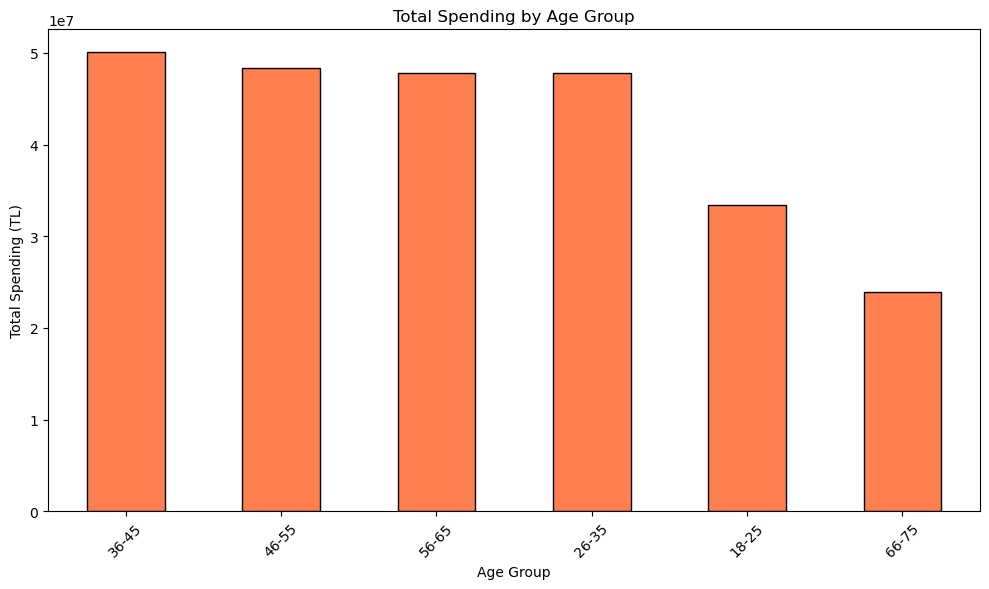

In [29]:
# Define age groups
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate total spending per group
age_group_spending = data.groupby('age_group')['total_spending'].sum().sort_values(ascending=False)

# Plot spending by age group
plt.figure(figsize=(10, 6))
age_group_spending.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending (TL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top Age Groups: The 36-45, 46-55, and 26-35 age groups are the top spenders, with each contributing significantly to total spending.

Younger and Older Age Groups: The 18-25 and 66-75 age groups contribute less to total spending, indicating that they might be less lucrative segments for high-value marketing campaigns.

Insight: Marketing campaigns should likely focus on the 26-55 age range, as these groups contribute the most to spending. This might include tailored promotions for these age segments to maximize returns.

### Recommendations:

1.Targeted Marketing:

Categories: Focus on high-spending categories like Clothing, Shoes, and Technology.

Demographics: Prioritize marketing efforts toward females and individuals in the 26-55 age range.

2.Further Analysis:

Product-Specific Insights: Consider analyzing spending patterns within specific product categories to further refine marketing strategies.

Frequency of Purchases: Investigate whether frequent small purchases or fewer large purchases drive total spending in different customer segments.

## Section 3 : Recommendations 

### 1. Sales by Payment Method

Clean the payment_method Column: We'll standardize the payment_method entries by merging similar categories and correcting typos.

We’ll calculate the total sales by each payment method.

Then, we'll create a pie chart to visualize the proportion of sales for each method.

payment_method
Cash           44450
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64


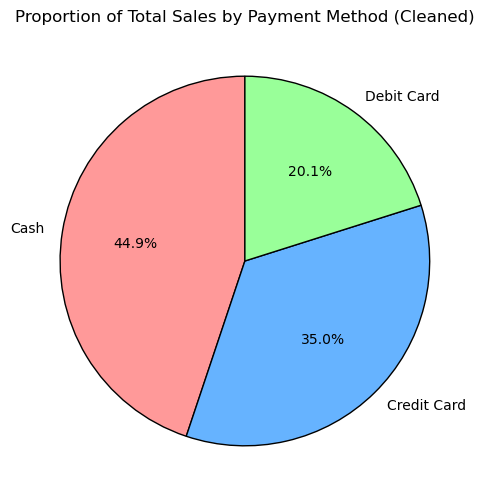

In [34]:
# Standardize payment methods
data['payment_method'] = data['payment_method'].replace({
    'CreditCard': 'Credit Card',
    'Cash Cash': 'Cash',
    'Debit Card': 'Debit Card',
    'Credit Card': 'Credit Card',
    'Cash': 'Cash'
})

# Verify the cleanup
print(data['payment_method'].value_counts())

# Create the pie chart
payment_method_sales_cleaned = data.groupby('payment_method')['total_spending'].sum()

plt.figure(figsize=(8, 6))
payment_method_sales_cleaned.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Total Sales by Payment Method (Cleaned)')
plt.ylabel('')  # Remove the y-label for better appearance
plt.show()


#### Analysis of the Results:

Proportion of Total Sales by Payment Method (Cleaned)
Cash: The largest proportion of sales (44.9%) is made via cash, indicating that a significant portion of customers prefers paying with cash.

Credit Card: The second most popular payment method is credit card, accounting for 35.0% of total sales. This suggests that a large group of customers prefer the convenience and possibly the rewards associated with credit card use.

Debit Card: The smallest segment (20.1%) uses debit cards, which might indicate a preference for credit over debit, possibly due to rewards or deferred payment benefits that credit cards offer.


#### Insights:

Customer Preferences: Given the strong preference for cash and credit cards, marketing campaigns could focus on promoting loyalty rewards or discounts for credit card users, while still offering incentives for cash purchases to retain those customers.

Potential for Growth: There might be an opportunity to increase debit card usage by offering specific promotions or benefits for customers using this payment method.

### 2. Sales Trend Over Time

We’ll first resample the data by month to calculate total monthly sales.

Then, we’ll create a line chart to visualize the trend over time

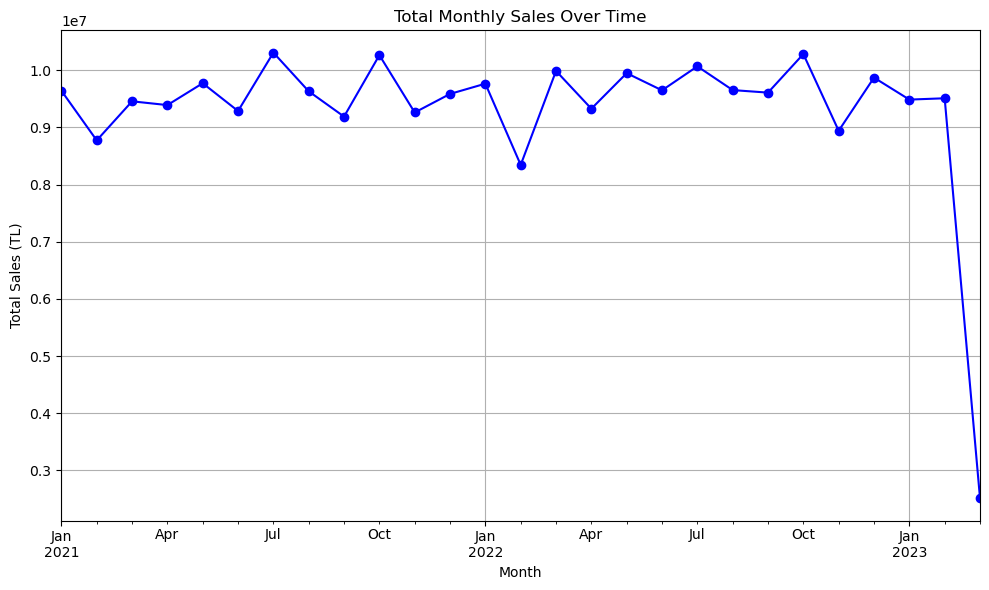

In [31]:
# Resample data to calculate monthly sales
data.set_index('invoice_date', inplace=True)  # Set the date as the index
monthly_sales = data.resample('M')['total_spending'].sum()

# Plot a line chart of total monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='blue', marker='o')
plt.title('Total Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (TL)')
plt.grid(True)
plt.tight_layout()
plt.show()


Total Monthly Sales Over Time

Sales Stability: The line chart shows that total monthly sales remained relatively stable throughout the year, with some fluctuations. The sales hover around 9 to 10 million TL per month, indicating consistent performance.

Seasonal Trends: There are minor peaks and troughs, which could correspond to seasonal shopping trends, but overall, the pattern is stable.

Recent Drop: The significant drop in sales at the end of the period (January 2023) is notable. This could be due to a data cutoff, an economic event, or other factors worth investigating further.


#### Insights:

Seasonality: The consistent sales suggest that while there are some seasonal effects, the business maintains a steady sales flow throughout the year. Campaigns could be timed to coincide with the observed peaks for maximum impact.

Investigate Drop: The sharp drop in January 2023 should be investigated to determine if it's a data issue, a seasonal effect, or something more significant. Depending on the cause, steps might need to be taken to address the decline.

## Recommendations for Report:


### 1 - Preferences for methods of payment

Analysis: The data presented in the pie chart shows that a large proportion of clients opt to make payments in cash (44.9%), with a slightly lower percentage choosing credit cards (35.0%), and a small portion utilizing debit cards (20.1%).


#### Leverage credit card usage -

a) Implement or improve loyalty programs for customers who use credit cards. For instance, provide points or cashback incentives that can be used for future buys. Encouraging frequent purchases from the 35% of sales made by credit card users could lead to increased sales.

b) Partnering with banks: Work together with credit card companies to offer special deals or incentives. For instance, partnering with big credit card companies for joint promotions could attract a larger customer base, particularly during important shopping periods.

c) Focused Marketing: Use data-driven strategies to reach out to regular credit card users with customized promotions. Customize marketing strategies to showcase advantages such as longer payment terms or special offers for credit card purchases.

#### Increase Debit Card Adoption -

a) Provide exclusive deals for individuals who opt for debit card payments, such as instant savings or waived transaction fees, to encourage more people to use this payment method.

b) Education Initiatives: Launch programs to educate customers on the benefits of utilizing debit cards, such as better budget management and avoiding interest charges, to attract financially savvy shoppers.

c) Promote the use of debit cards with digital wallets, which are becoming more popular, for a convenient, contactless payment experience.

#### Maintain Cash Payment Incentives -

a) Cash discounts should be maintained to retain the significant number of customers who prefer paying in cash by providing small discounts. This could also aid in lowering the costs linked to card payment transactions.

b) Convenience Marketing: Highlight the ease and promptness of cash payments in advertising materials, especially in establishments or outlets where cash remains the preferred payment option.

c) Hybrid Promotions: Consider using promotions that offer rewards or discounts when customers use both cash and alternative payment methods (like cash with a loyalty card) to encourage a slow shift towards digital payments while respecting customer preferences.

### 2 - Sales Trend Analysis

Observation: The data presented in the line graph indicates that there is a consistent sales trend throughout the year, with monthly sales typically falling within the range of 9 to 10 million TL. Nevertheless, a notable decrease in sales is noticed towards the conclusion of the period (January 2023).

Recommendations:

#### Take advantage of stability by running campaigns consistently -

a) Continuous marketing campaigns should be implemented throughout the year to ensure ongoing customer engagement due to a steady sales trend. Concentrate on timeless promotions that attract a wide range of people, including loyalty perks, seasonal sales, and membership advantages.

b) Strategic Peak Targeting involves recognizing and taking advantage of small spikes in sales, often associated with specific times of the year like holidays, school season, or year-end shopping. Coordinate marketing campaigns like holiday promotions or end-of-season sales with these peaks to achieve maximum effectiveness.

#### Examine and Solve the Decline in Sales -

a) Verify the decline in January 2023 is not caused by data discrepancies like missing or inaccurately recorded information. If the information is correct, additional investigation is needed to determine the reason.

b) Analysis of external factors: Evaluate external factors which may have led to the decrease in sales, like economic circumstances, shifts in consumer habits, or heightened competition. For instance, if the decline occurs during a major economic recession, you may want to think about modifying pricing tactics or introducing more affordable products.

c) Customer Feedback: Collect feedback from customers to pinpoint any internal factors causing the decrease, such as problems with product availability, alterations in store procedures, or issues with customer service.

d) Plan of action: Create a strategy to combat any adverse trends. For example, if the decline occurs at certain times of the year, think about implementing unique deals or launching new products to increase sales in quieter periods.

#### Enhance forecast analysis techniques -

a) Sales Forecasting: Employ predictive analytics to estimate future sales patterns through examination of historical data. This can help anticipate and decrease future sales drops by adjusting inventory levels, marketing budget, and promotional activities.


b) Utilize scenario planning to get ready for varying possibilities, like more economic slumps or changes in consumer choices. This will enable quick responses to shifting market conditions.

#### Summary

These specific suggestions aim to assist the business in leveraging existing strengths like consistent sales and high usage of cash and credit cards, as well as tackling potential obstacles such as the recent decrease in sales and limited use of debit cards. Through the utilization of these tactics, the company can strengthen its position in the market, enhance customer happiness, and ultimately increase sales and profitability.
